<a href="https://colab.research.google.com/github/ngoan22mse23088/ImageVideoProcessing/blob/master/IVP501_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

problem 3.1 - 3.5

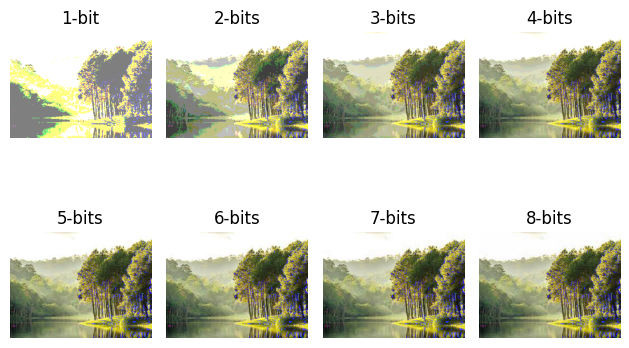

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Image URL on GitHub
image_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/blob/master/Image/nature.jpg?raw=true'

# Download the image
image_data = urlopen(image_url)

# Convert the downloaded data to a PIL Image object
pil_image = Image.open(image_data)

# Convert PIL Image to NumPy array
img = np.array(pil_image)

# Repeat with different number of bits
for no_of_bit in range(1, 9):
    # Quantize to a given number of bits
    no_of_level = 2 ** no_of_bit
    level_gap = 256 / no_of_level

    # Quantization
    quantized_img = np.uint8(np.ceil(img / level_gap) * level_gap - 1)

    # Plot image
    plt.subplot(2, 4, no_of_bit)
    plt.imshow(quantized_img)
    plt.axis('off')

    # Image caption and saving
    if no_of_bit == 1:
        name = str(no_of_bit) + '-bit'
    else:
        name = str(no_of_bit) + '-bits'

    plt.title(name)

plt.tight_layout()
plt.show()


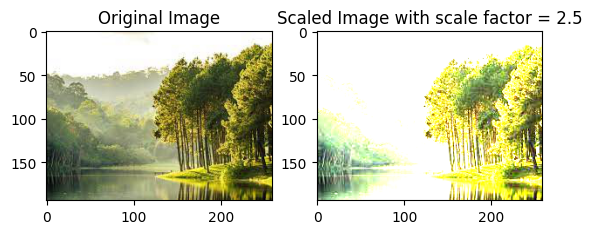

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Image URL on GitHub
image_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Image/nature.jpg'

# Download the image
image_data = urlopen(image_url)

# Convert the downloaded data to a PIL Image object
pil_image = Image.open(image_data)

# Convert PIL Image to NumPy array
img = np.array(pil_image).astype(float) / 255.0

# Brightness adjustment by intensity scaling
scale = 2.5  # Lighter
scaled_img = scale * img

# Plot images
plt.subplot(1, 2, 1)
plt.imshow(img, vmin=0, vmax=1)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(scaled_img, vmin=0, vmax=1)
plt.title('Scaled Image with scale factor = 2.5')

# Save the scaled image
plt.savefig('Brightness_Lighter.jpg')
plt.show()

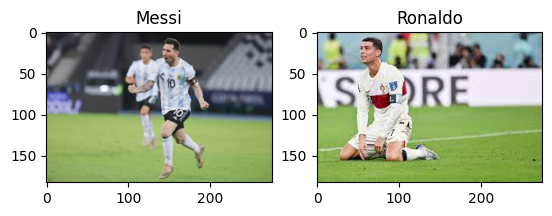

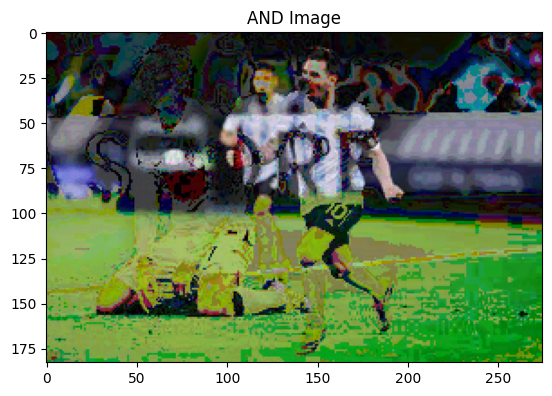

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# URLs of the images on GitHub
image1_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Image/messi.jpg'
image2_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Image/ronaldo.jpg'

# Download the images
image1_data = urlopen(image1_url)
image2_data = urlopen(image2_url)

# Convert the downloaded data to PIL Image objects
image1 = Image.open(image1_data)
image2 = Image.open(image2_data)

# Resize image1 to match the desired size
desired_size = (275, 183)
image1 = image1.resize(desired_size)

# Convert PIL Images to NumPy arrays
I1 = np.array(image1)
I2 = np.array(image2)

# Perform bitwise AND operation
I_and = np.bitwise_and(I1, I2)

# Plot images
plt.subplot(1, 2, 1)
plt.imshow(I1)
plt.title('Messi')

plt.subplot(1, 2, 2)
plt.imshow(I2)
plt.title('Ronaldo')

plt.figure()
plt.imshow(I_and, cmap='gray', vmin=0, vmax=255)
plt.title('AND Image')

# Save the AND image
plt.savefig('AND_image.jpg')
plt.show()

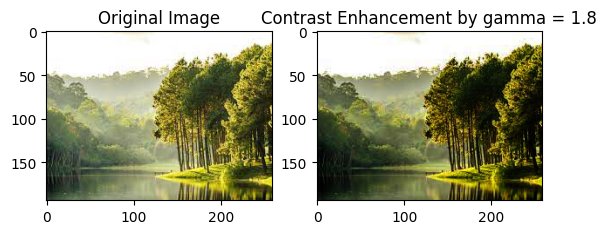

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Image URL on GitHub
image_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Image/nature.jpg'

# Download the image
image_data = urlopen(image_url)

# Convert the downloaded data to a PIL Image object
pil_image = Image.open(image_data)

# Convert PIL Image to NumPy array
img = np.array(pil_image).astype(float) / 255.0

# Contrast enhancement by changing 'gamma' characteristics
# gamma = 1.0  # Unchanged
# gamma = 0.3  # Decrease contrast
gamma = 1.8  # Increase contrast
gamma_img = img ** gamma

# Plot images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gamma_img)
plt.title('Contrast Enhancement by gamma = 1.8')

# Save the contrast-enhanced image
plt.savefig('Contrast_Increase.png')
plt.show()

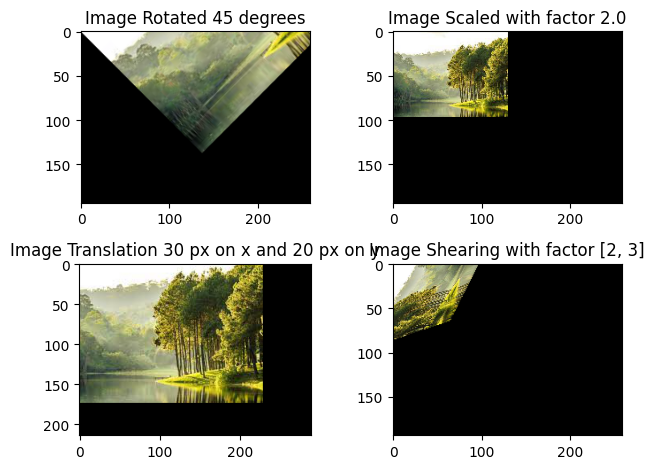

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import warp, AffineTransform

# Load image from Git repository
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/nature.jpg')

# Rotation an angle = 45 degrees
rotation_matrix = np.array([[np.cos(np.deg2rad(45)), -np.sin(np.deg2rad(45)), 0],
                            [np.sin(np.deg2rad(45)), np.cos(np.deg2rad(45)), 0],
                            [0, 0, 1]])
Imga = warp(Img, AffineTransform(matrix=rotation_matrix))
plt.subplot(2, 2, 1)
plt.imshow(Imga)
plt.title('Image Rotated 45 degrees')

# Scaling with a factor = 2.0
scaling_matrix = np.array([[2.0, 0, 0],
                           [0, 2.0, 0],
                           [0, 0, 1]])
Imgb = warp(Img, AffineTransform(matrix=scaling_matrix))
plt.subplot(2, 2, 2)
plt.imshow(Imgb)
plt.title('Image Scaled with factor 2.0')

# Translation 30 pixels on x and 20 pixels on y
translation_matrix = np.array([[1, 0, 30],
                               [0, 1, 20],
                               [0, 0, 1]])
Imgc = warp(Img, AffineTransform(matrix=translation_matrix),
            output_shape=(Img.shape[0]+20, Img.shape[1]+30))
plt.subplot(2, 2, 3)
plt.imshow(Imgc)
plt.title('Image Translation 30 px on x and 20 px on y')

# Shearing
shearing_matrix = np.array([[1, 3, 0],
                            [2, 1, 0],
                            [0, 0, 1]])
Imgd = warp(Img, AffineTransform(matrix=shearing_matrix))
plt.subplot(2, 2, 4)
plt.imshow(Imgd)
plt.title('Image Shearing with factor [2, 3]')

plt.tight_layout()
plt.show()

Problem 4.1

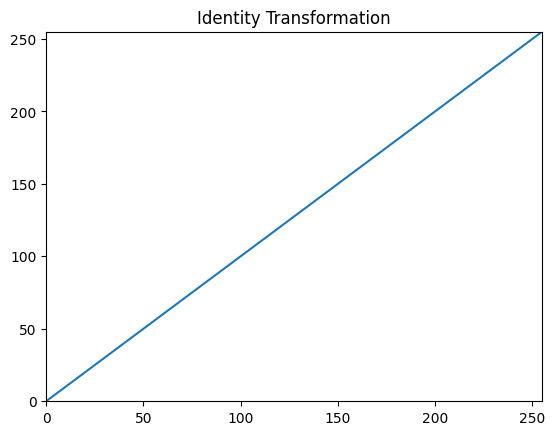

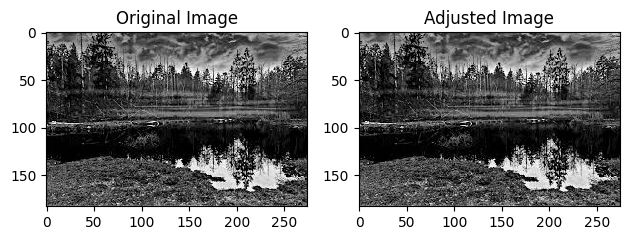

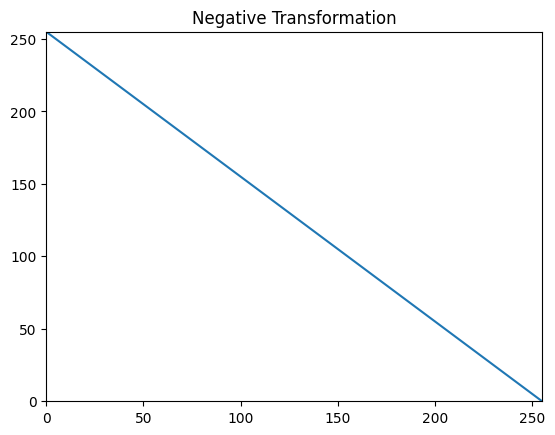

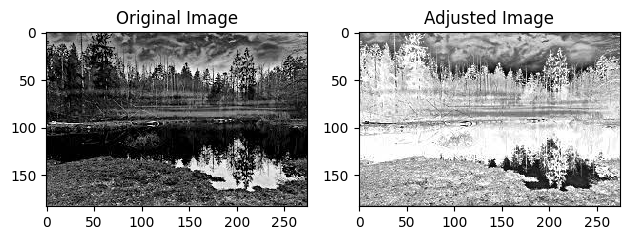

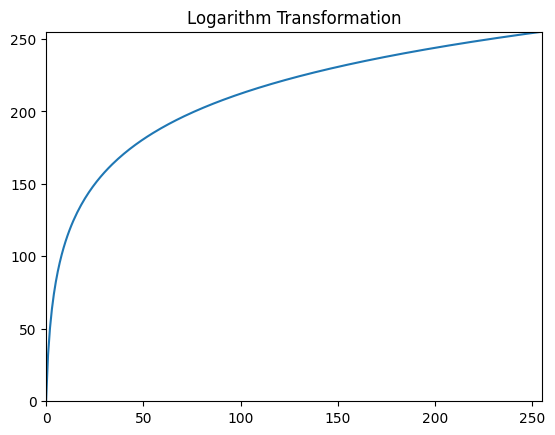

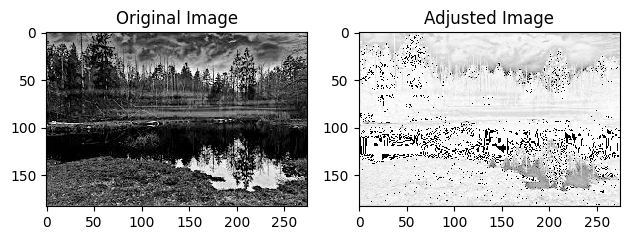

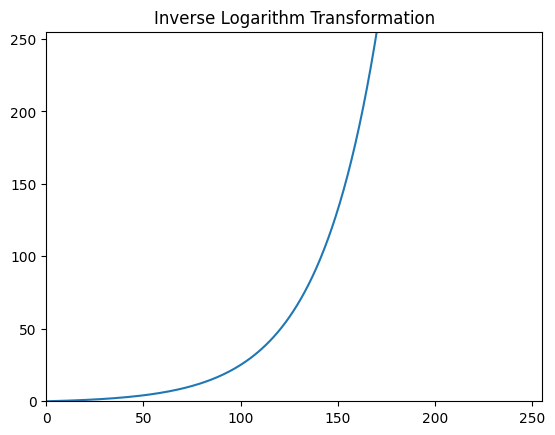

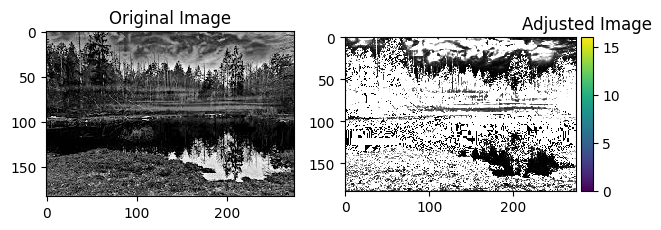

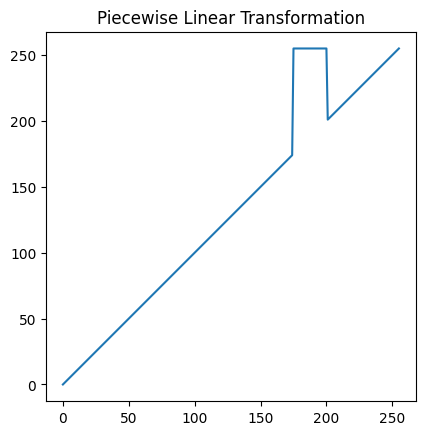

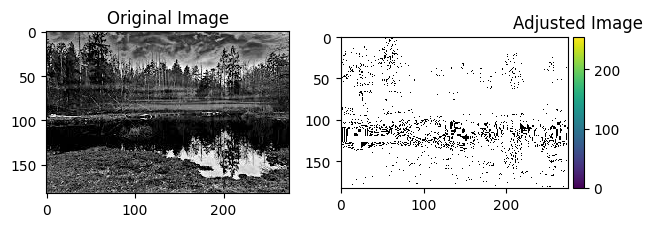

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.util import img_as_ubyte

# Load image from Git repository
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/swamp.jpg')

# Normalize image to range [0, 1]
Img = img_as_ubyte(Img)

#a. Contrast with identity transformation
x = np.arange(256, dtype=np.uint8)
plt.plot(x)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Identity Transformation')
plt.show()

# Apply identity transformation to the image
Img_idt = x[Img]
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_idt)
plt.title('Adjusted Image')
plt.show()

#b. Contrast with negative transformation
x_neg = 255 - x
plt.plot(x_neg)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Negative Transformation')
plt.show()

# Apply negative transformation to the image
Img_cpm = 255 - Img
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_cpm)
plt.title('Adjusted Image')
plt.show()

#c. Contrast with logarithm transformation
x = np.arange(256)
c = 255 / np.log(256)
y = c * np.log(x + 1)

plt.plot(y)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Logarithm Transformation')
plt.show()

# Apply logarithm transformation to the image
Img_log = y[img_as_ubyte(Img * 255 / np.max(Img))] / 255
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_log)
plt.title('Adjusted Image')
plt.show()

#d. Contrast with inverse logarithm transformation
x = np.arange(256)
c = 255 / np.log(4096)
y = np.exp(x / c) - 1

plt.plot(y)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Inverse Logarithm Transformation')
plt.show()

# Apply inverse logarithm transformation to the image
Img_invlog = y[img_as_ubyte(Img * 255 / np.max(Img))] / 255
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_invlog)
plt.title('Adjusted Image')
plt.show()

#e. Contrast with piecewise linear transformation
y = np.zeros(256)
y[:175] = np.arange(175)
y[175:201] = 255
y[201:256] = np.arange(201, 256)

# Apply piecewise linear transformation to the image
Img_pcslin = y[Img.astype(int)]
plt.plot(y)
plt.axis('tight')
plt.axis('square')
plt.title('Piecewise Linear Transformation')
plt.show()

plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_pcslin)
plt.title('Adjusted Image')
plt.show()

Problem 5.1 - 5.6

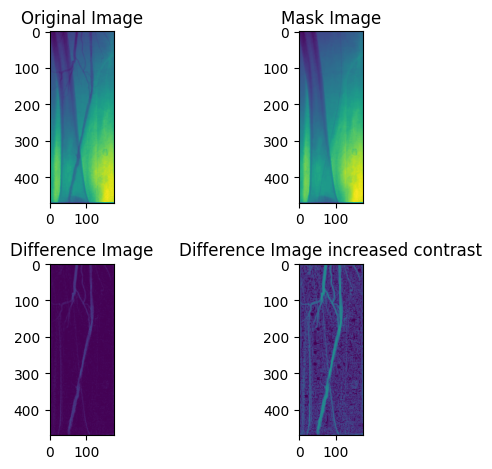

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from PIL import Image
import urllib.request

# URLs of the images in the GitHub repository
liveImg_url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/live.jpg'
maskImg_url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/mask.jpg'

# Download the images using urllib
urllib.request.urlretrieve(liveImg_url, 'live.jpg')
urllib.request.urlretrieve(maskImg_url, 'mask.jpg')

# Load images
liveImg = imread('live.jpg').astype(np.float64)
maskImg = imread('mask.jpg').astype(np.float64)

# Calculate the difference between two images
diffImg = np.abs(maskImg - liveImg)
gamma = 0.4
diffImg_constrated = diffImg ** gamma

# Show images
plt.subplot(2, 2, 1)
plt.imshow(liveImg)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(maskImg)
plt.title('Mask Image')

plt.subplot(2, 2, 3)
plt.imshow(diffImg)
plt.title('Difference Image')

plt.subplot(2, 2, 4)
plt.imshow(diffImg_constrated)
plt.title('Difference Image increased contrast')

plt.tight_layout()
plt.show()

# Save images
imsave('Image_Subtraction.jpg', diffImg)
imsave('Image_Subtraction_w_con.jpg', diffImg_constrated)

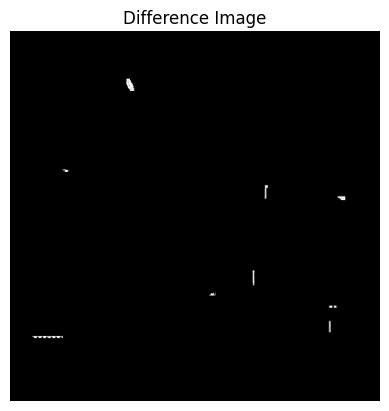

<ipython-input-19-d6a3bf8c44b2>:26: UserWarning: Mask_Comparison.png is a low contrast image
  imsave('Mask_Comparison.png', diffImg)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
import urllib.request

# URLs of the images in the GitHub repository
maskImg1_url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/mask1.png'
maskImg2_url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/mask2.png'

# Download the images using urllib
urllib.request.urlretrieve(maskImg1_url, 'mask1.png')
urllib.request.urlretrieve(maskImg2_url, 'mask2.png')

# Load images
maskImg1 = imread('mask1.png').astype(np.float64)
maskImg2 = imread('mask2.png').astype(np.float64)

# Perform image subtraction and comparison
diffImg = np.abs(maskImg2 - maskImg1)
plt.imshow(diffImg, cmap='gray')
plt.title('Difference Image')
plt.axis('off')
plt.show()

# Save the difference image
imsave('Mask_Comparison.png', diffImg)

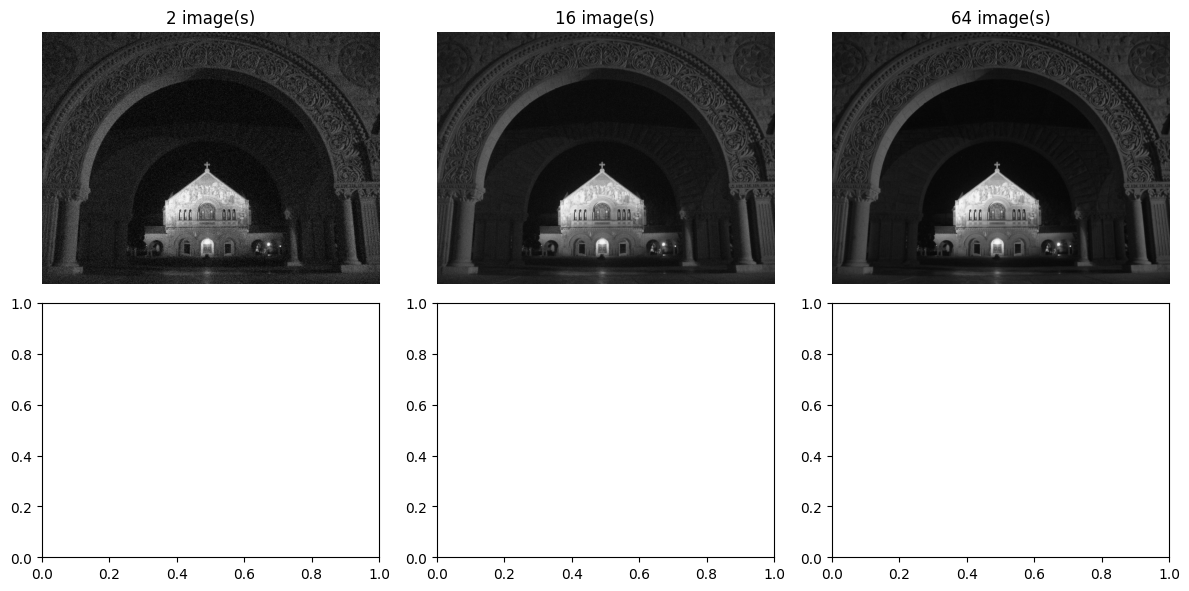

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte, img_as_float
from skimage.util import random_noise
import urllib.request

# URL of the image in the GitHub repository
img_url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/quadnight.jfif'

# Download the image using urllib
urllib.request.urlretrieve(img_url, 'quadnight.jfif')

# Load the image
Img = img_as_float(rgb2gray(imread('quadnight.jfif')))

# Repeat over different number of samples
nArray = [1, 2, 8, 16, 32, 64]
fig, axes = plt.subplots(2, len(nArray)//2, figsize=(12, 6))

for i, N in enumerate(nArray):
    avgImg = np.zeros_like(Img)  # Initialize an empty image

    # Add Gaussian noise to each image and accumulate them to avg image
    for j in range(N):
        noisyImg = random_noise(Img, mode='gaussian', var=0.01)
        avgImg += noisyImg

    # Compute the average image and show it
    avgImg /= N
    ax = axes[i//len(nArray)//2, i%len(nArray)//2]
    ax.imshow(avgImg, cmap='gray')
    ax.set_title(f"{N} image(s)")
    ax.axis('off')

plt.tight_layout()
plt.show()

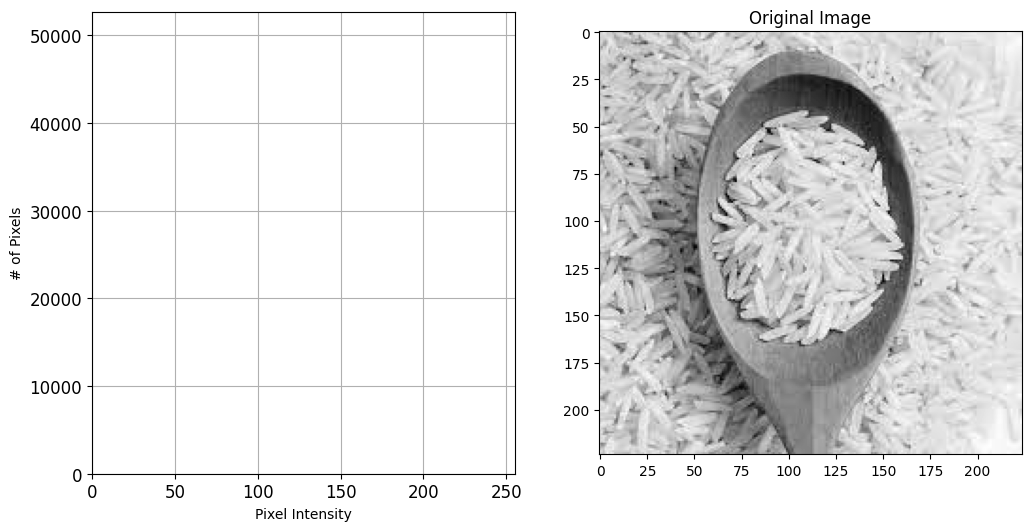

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

# Load the image from Git repository
Img = rgb2gray(imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/rice.jfif'))

# Generate histogram
hist, bins = np.histogram(Img.flatten(), bins=256, range=[0, 256])

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bins[:-1], hist)
plt.grid(True)
plt.xlabel('Pixel Intensity')
plt.ylabel('# of Pixels')
plt.xlim([0, 255])
plt.tick_params(axis='both', labelsize=12)

# Display the original image
plt.subplot(1, 2, 2)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')

# Save the figure with histogram
plt.savefig('Histogram.png')
plt.show()

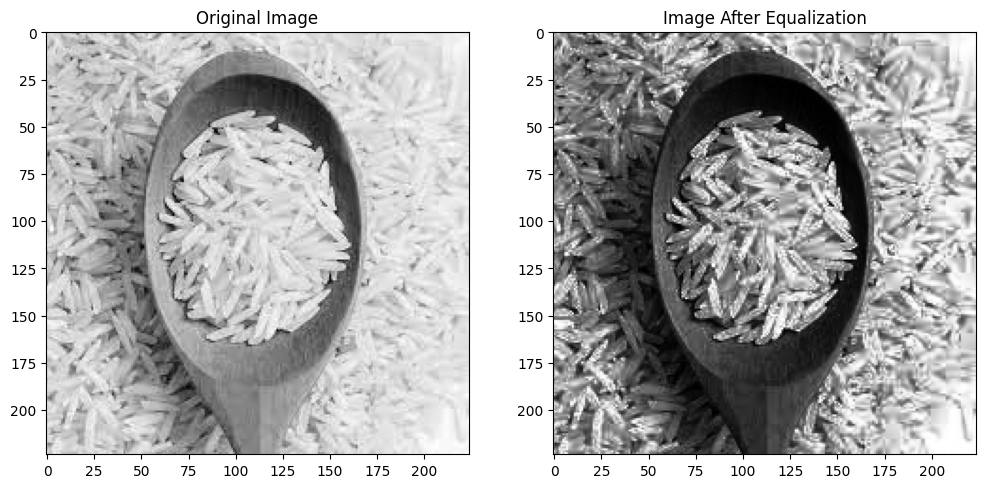

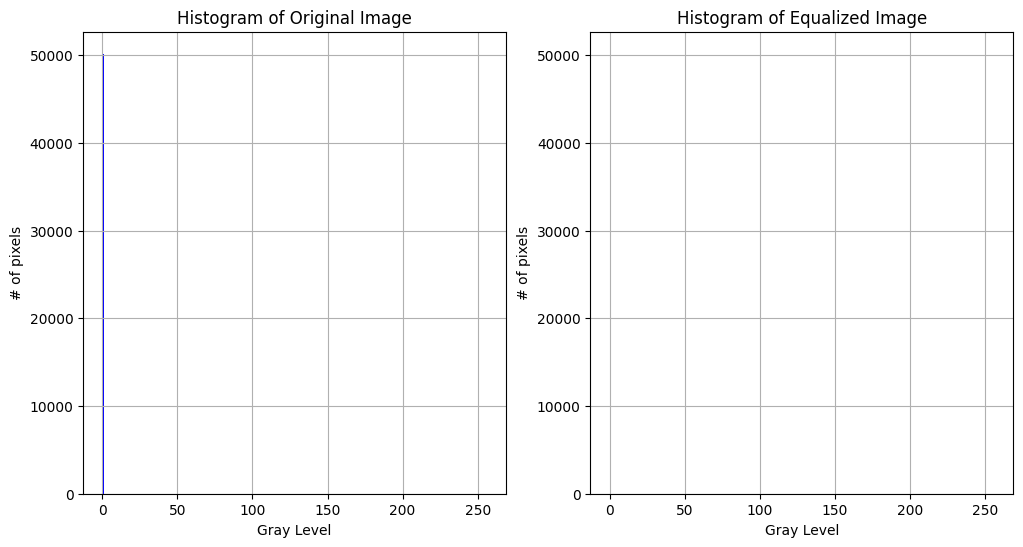

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import exposure

# Load the image from Git repository
Img = rgb2gray(imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/rice.jfif'))

# Perform histogram equalization
eqImg = exposure.equalize_hist(Img)

# Show images
plt.figure(1, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(eqImg, cmap='gray')
plt.title('Image After Equalization')

# Show histograms of two images
plt.figure(2, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Img.flatten(), bins=256, range=[0, 256], color='blue')
plt.grid(True)
plt.xlabel('Gray Level')
plt.ylabel('# of pixels')
plt.title('Histogram of Original Image')

plt.subplot(1, 2, 2)
plt.hist(eqImg.flatten(), bins=256, range=[0, 256], color='blue')
plt.grid(True)
plt.xlabel('Gray Level')
plt.ylabel('# of pixels')
plt.title('Histogram of Equalized Image')

plt.show()

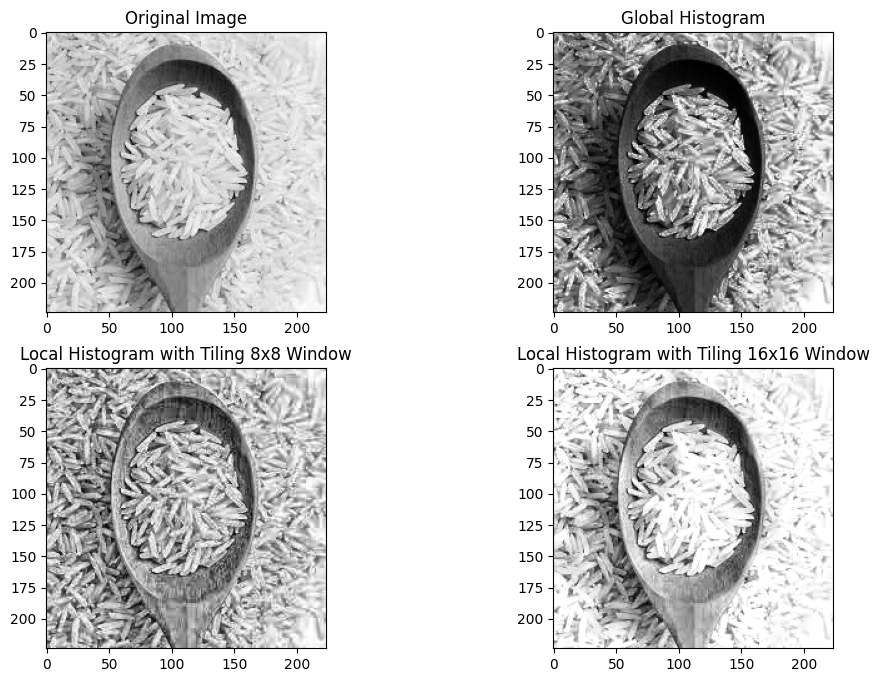

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import exposure

# Load the image from Git repository
Img = rgb2gray(imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Image/rice.jfif'))

# Apply global and local adaptive histogram equalization
# a. Global
eqImg = exposure.equalize_hist(Img)
# b. and c. Contrast Limited Adaptive Histogram Equalization (CLAHE) in two cases: sliding window 8x8 and 16x16
claheImg1 = exposure.equalize_adapthist(Img, kernel_size=(8, 8))
claheImg2 = exposure.equalize_adapthist(Img, kernel_size=(16, 16))

# Show images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(eqImg, cmap='gray')
plt.title('Global Histogram')

plt.subplot(2, 2, 3)
plt.imshow(claheImg1, cmap='gray')
plt.title('Local Histogram with Tiling 8x8 Window')

plt.subplot(2, 2, 4)
plt.imshow(claheImg2, cmap='gray')
plt.title('Local Histogram with Tiling 16x16 Window')

# Save images
plt.imsave('CLAHE_Global.png', eqImg, cmap='gray')
plt.imsave('CLAHE_Local_8by8.png', claheImg1, cmap='gray')
plt.imsave('CLAHE_Local_16by16.png', claheImg2, cmap='gray')

plt.show()